## Observations and Insights 

In [189]:
%matplotlib inline

In [190]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how="outer")
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [191]:
# Checking the number of mice.- unique
mouse_number = len(combined["Mouse ID"].unique())
mouse_number

249

In [192]:
# Checking the number of Timepoint.- unique
timepoint_number =len(combined["Timepoint"].unique())
timepoint_number

10

In [211]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study_complete.duplicated(subset=None, keep='first')


duplicate_mice =combined.loc[combined.duplicated(subset=['Mouse ID','Timepoint',]), 'Mouse ID'].unique()
duplicate_mice

# duplicate_mice =combined.loc[combined.duplicated(['Mouse ID','Timepoint',])]
# duplicate_mice

array(['g989'], dtype=object)

In [219]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all=pd.DataFrame(duplicate_mice)
duplicate_mice_all

,0
0,g989


In [245]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined[combined['Mouse ID'].isin(duplicate_mice)==False]
clean_df

# clean_df = duplicate_mice_all.drop_duplicates()
# clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [254]:
# Checking the number of mice in the clean DataFrame.

clean_df.loc[:, ["Mouse ID"]]

# clean_number_mice.unique()




clean_number_mice = clean_df["Mouse ID"].unique()
clean_number_mice

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

## Summary Statistics

In [248]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumorvl = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

median_tumorvl = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

variance_tumorvl = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

stand_dev_tumorvl = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

sem_tumorvl = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean": mean_tumorvl, "Median": median_tumorvl, "Variance": variance_tumorvl, "Standard Deviation": stand_dev_tumorvl, "SEM": sem_tumorvl })
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [249]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agreg_df =clean_df.groupby('Drug Regimen')
summary_stats_df = agreg_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_stats_df

# tumorvl_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

# tumorvl_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

# tumorvl_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

# stand_dev_tumor = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

# tumorvl_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# stats_df = pd.DataFrame({"Mean": mean_tumorvl, "Median": median_tumorvl, "Variance": variance_tumorvl, "Standard Deviation": stand_dev_tumorvl, "SEM": sem_tumorvl })
# stats_df.agg(['Drug Regimen'])

/var/folders/7z/2_ssh4pj4dl6pp5615v67s5w0000gn/T/ipykernel_93475/2318788183.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_df = agreg_df.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [250]:
clean_df.head()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


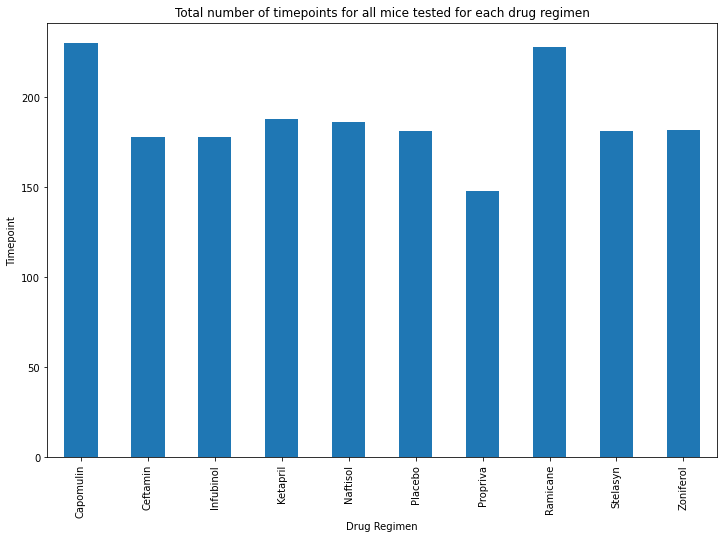

In [227]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen = clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()
drug_regimen
drug_regimen = drug_regimen.plot(kind='bar', figsize =(12,8))

drug_regimen.set_xlabel("Drug Regimen")
drug_regimen.set_ylabel("Timepoint")

plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.tight_layout
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.show()


In [257]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

y_axis = drug_regimen
x_axis = np.arange(len())

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

TypeError: 'Series' object is not callable

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
